<h2>Daily Rainfall Data<h2>

<h2>introduction<h2>

The Indian Rainfall Dataset contains over 15 years of daily rainfall records across all 28 states and 8 union territories of India, covering the period from January 2009 to July 2024. Sourced from the India Water Resources Information System (India-WRIS), it includes actual, forecasted, and normal rainfall values, along with deviation from historical averages. This dataset is valuable for climate research, weather forecasting, and agricultural analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv(r'c:\Data science\ML_Project\daily-rainfall-at-state-level.csv')
print(df.head())

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204876 entries, 0 to 204875
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          204876 non-null  int64  
 1   date        204876 non-null  object 
 2   state_code  204876 non-null  int64  
 3   state_name  204876 non-null  object 
 4   actual      187714 non-null  float64
 5   rfs         199011 non-null  float64
 6   normal      193358 non-null  float64
 7   deviation   173855 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 12.5+ MB
None


: 

In [ ]:
print(df.isna().sum())

id                0
date              0
state_code        0
state_name        0
actual        17162
rfs            5865
normal        11518
deviation     31021
dtype: int64


: 

In [ ]:
df = df.drop(columns=['id'])
df['actual'].fillna(df['actual'].mean(), inplace=True)
df['rfs'].fillna(df['rfs'].mean(), inplace=True)
df['normal'].fillna(df['normal'].mean(), inplace=True)
df['deviation'].fillna(df['deviation'].mean(), inplace=True)


: 

In [ ]:
print(df.isna().sum())

date          0
state_code    0
state_name    0
actual        0
rfs           0
normal        0
deviation     0
dtype: int64


: 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['state_name'] = le.fit_transform(df['state_name'])
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
X = df[['state_name', 'rfs', 'normal', 'deviation', 'year', 'month']]
y = df['actual']
print(X.head())

   state_name       rfs  normal  deviation  year  month
0          34  0.003906    2.19     -100.0  2009      1
1           3  0.000000    0.52     -100.0  2009      1
2          32  0.000000    0.09     -100.0  2009      1
3          30  0.000000    0.17     -100.0  2009      1
4          11  0.008566    3.31     -100.0  2009      1


: 

In [ ]:
corr=df.corr(numeric_only=True)
corr

,state_code,state_name,actual,rfs,normal,deviation,year,month
state_code,1.000000e+00,2.273840e-02,0.033560,0.013837,0.031347,0.010668,-2.867252e-13,1.497525e-15
state_name,2.273840e-02,1.000000e+00,0.015354,-0.006591,-0.021620,0.007651,-2.231429e-13,7.712130e-16
actual,3.355971e-02,1.535422e-02,1.000000,0.497712,0.431517,0.122533,4.634432e-03,7.931742e-02
rfs,1.383656e-02,-6.591189e-03,0.497712,1.000000,0.180250,0.084845,-1.176132e-02,8.376361e-02
normal,3.134694e-02,-2.161952e-02,0.431517,0.180250,1.000000,-0.021269,-6.679683e-04,1.155542e-01
deviation,1.066768e-02,7.650660e-03,0.122533,0.084845,-0.021269,1.000000,1.283410e-02,5.282404e-03
year,-2.867252e-13,-2.231429e-13,0.004634,-0.011761,-0.000668,0.012834,1.000000e+00,-4.680340e-02
month,1.497525e-15,7.712130e-16,0.079317,0.083764,0.115554,0.005282,-4.680340e-02,1.000000e+00


: 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'state_code'),
  Text(1, 0, 'state_name'),
  Text(2, 0, 'actual'),
  Text(3, 0, 'rfs'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'deviation'),
  Text(6, 0, 'year'),
  Text(7, 0, 'month')])

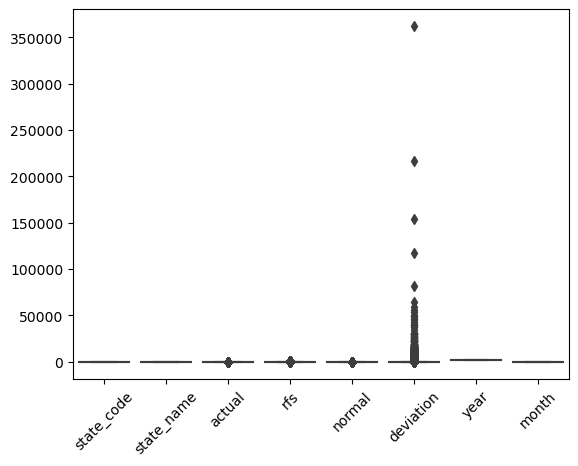

: 

In [ ]:
import seaborn as sns
sns.boxplot(df)
import matplotlib.pyplot as plt
plt.xticks(rotation=45)

Outliers removed successfully from: ['actual', 'rfs', 'normal', 'deviation']
Remaining data shape: (133392, 9)


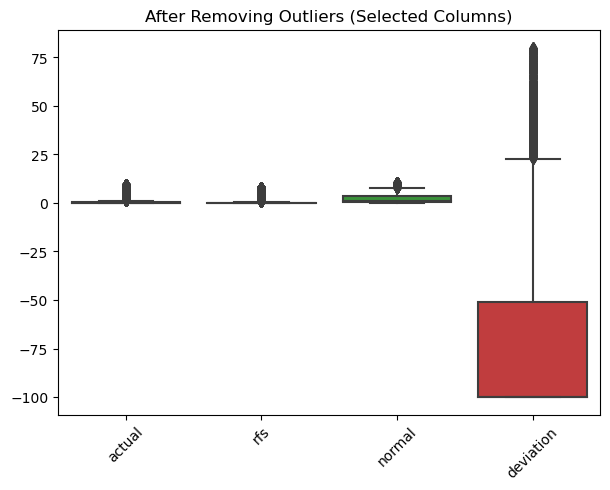

: 

In [ ]:
cols = ['actual', 'rfs', 'normal', 'deviation']
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed successfully from:", cols)
print("Remaining data shape:", df.shape)
plt.figure(figsize=(7,5))
sns.boxplot(data=df[cols])
plt.title("After Removing Outliers (Selected Columns)")
plt.xticks(rotation=45)
plt.show()

R² Score: 0.47889214782500933
Mean Absolute Error: 0.6372573242622054


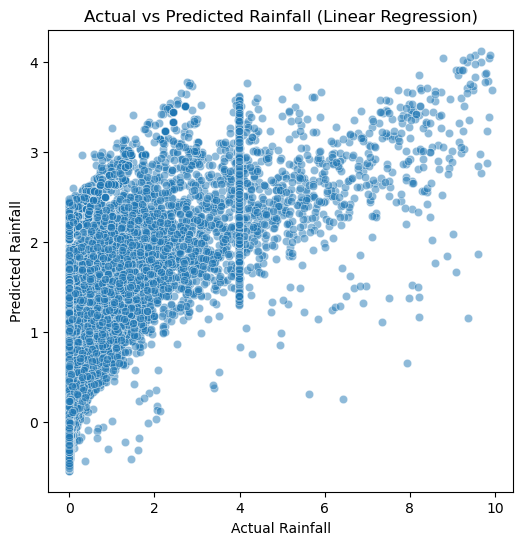

: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
X = df[['state_name', 'rfs', 'normal', 'deviation', 'year', 'month']]
y = df['actual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs Predicted Rainfall (Linear Regression)")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(" Random Forest R² Score:", round(r2 * 100, 2), "%")

 Random Forest R² Score: 98.51 %


: 

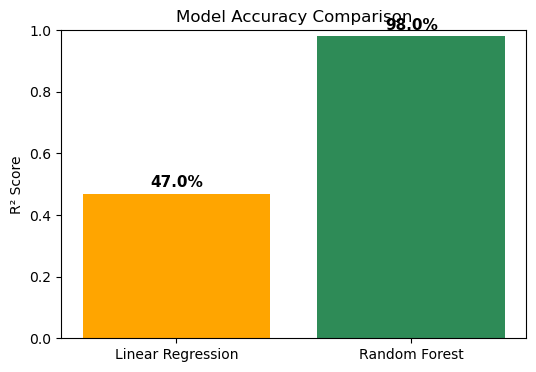

: 

In [ ]:
import matplotlib.pyplot as plt
acc_lin = 0.47     
acc_rf = 0.98      
plt.figure(figsize=(6,4))
plt.bar(['Linear Regression', 'Random Forest'],
        [acc_lin, acc_rf],
        color=['orange', 'seagreen'])

plt.title('Model Accuracy Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1) 
for i, acc in enumerate([acc_lin, acc_rf]):
    plt.text(i, acc + 0.02, f'{acc*100:.1f}%', ha='center', fontsize=11, fontweight='bold')
plt.show()

<h2>conculsion<h2>

The dataset uses features (X) such as state_name, forecasted rainfall (rfs), normal rainfall, deviation from average, year, and month to predict the target variable (y), which is actual rainfall. When Linear Regression was applied, it achieved an R² score of 47%, indicating a moderate fit. Using Random Forest Regressor, the prediction improved significantly, achieving an R² score of 98%, demonstrating a strong ability to capture the relationship between the features and actual rainfall.

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# -------------------------
# Page config & CSS
# -------------------------
st.set_page_config(page_title="Daily Rainfall Prediction", layout="centered")

st.markdown(
    '''<style>
    .stApp {
        background-color: #f0f2f6;
    }
    h1 {
        color: #4B0082;
        text-align: center;
    }
    h2, h3 {
        color: #2F4F4F;
    }
    .stDataFrame {
        border: 2px solid #B0C4DE;
        border-radius: 10px;
        padding: 5px;
        box-shadow: 2px 2px 10px rgba(0,0,0,0.1);
    }
    .prediction-box {
        border: 2px solid #9370DB;
        border-radius: 15px;
        padding: 20px;
        background-color: #fff;
        box-shadow: 0 4px 10px rgba(0,0,0,0.1);
        margin-top: 25px;
    }
    button[kind="primary"] {
        background-color: #7B68EE !important;
        color: white !important;
        border-radius: 8px !important;
    }
    </style>''',
    unsafe_allow_html=True
)

st.title("Daily Rainfall Prediction")
st.write("Predict tomorrow's rainfall (mm) based on recent historical rainfall data.")

# -------------------------
# Data upload
# -------------------------
st.subheader("Upload Dataset")
uploaded_file = st.file_uploader("Upload CSV file containing 'rainfall' column", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.success("✅ File uploaded successfully!")
else:
    st.info("Upload a CSV file to continue...")
    st.stop()

# Check for rainfall column
if "rainfall" not in df.columns:
    st.error("CSV must contain a column named 'rainfall'.")
    st.stop()

# Preview dataset
st.subheader("Dataset Preview")
st.dataframe(df.head())

# -------------------------
# Feature creation (using last N days)
# -------------------------
window_size = st.number_input("Number of previous days to use (N):", min_value=1, max_value=30, value=7)

def create_features(series, window):
    X, y = [], []
    for i in range(window, len(series)):
        X.append(series[i-window:i])
        y.append(series[i])
    return np.array(X), np.array(y)

series = df["rainfall"].values
X, y = create_features(series, window_size)

# -------------------------
# Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# Train model
# -------------------------
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# -------------------------
# Model evaluation
# -------------------------
st.subheader("Model Performance")

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

st.write(f"✅ **RMSE:** {rmse:.3f} mm")
st.write(f"✅ **R² Score:** {r2:.3f}")

# Scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.6, label="Predicted")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax.set_xlabel("Actual Rainfall (mm)")
ax.set_ylabel("Predicted Rainfall (mm)")
ax.set_title("Actual vs Predicted")
st.pyplot(fig)

# -------------------------
# Prediction Box
# -------------------------
st.markdown('<div class="prediction-box">', unsafe_allow_html=True)
st.subheader("Tomorrow's Rainfall Prediction")

st.write(f"Using last **{window_size} days** from dataset:")

last_values = series[-window_size:]
st.write(last_values)

if st.button("Predict Next Day"):
    input_data = np.array(last_values).reshape(1, -1)
    next_day = model.predict(input_data)[0]
    st.success(f"🌧️ Predicted Rainfall for Tomorrow: **{next_day:.2f} mm**")

st.markdown('</div>', unsafe_allow_html=True)

# -------------------------
# Trend graph
# -------------------------
st.subheader("Recent Rainfall Trend (Last 60 Days)")
fig2, ax2 = plt.subplots()
ax2.plot(df.index[-60:], series[-60:], marker='o')
ax2.set_xlabel("Index")
ax2.set_ylabel("Rainfall (mm)")
ax2.set_title("Rainfall Trend (60 Days)")
st.pyplot(fig2)


ModuleNotFoundError: No module named 'streamlit'

: 